# Multi Layer Perceptron for Image Classification

### Überblick

- *Image Classification*: Apfel, Orange, Birne in einem Bild identifizieren
- Mittels Python und Keras

### Bibliotheken


In [1]:
import numpy as np
import tensorflow as tf
from time import time

from keras.datasets import cifar100
from keras.callbacks import TensorBoard
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, Activation

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

Using TensorFlow backend.


## Vorverarbeitung der Daten

### Herunterladen und Split in Trainings- und Testdatensatz
- CIFAR100-Datensatz 
- **60.000 farbigen Bildern** aufgeteilt in **50.000 Trainingsbilder** und **10.000 Testbildern** mit Kategorien und Subkategorien
- Wir reduzieren unsere Daten auf die Kategorien: **Apple, Orange, Pear** über die ID: Apple = 0, Orange = 53, Pear = 57

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
print("Image Data Shape:", x_train.shape)
print("Data Type of Images:", type(x_train))
print("Labels Shape:", y_train.shape)

('Image Data Shape:', (50000, 32, 32, 3))
('Data Type of Images:', <type 'numpy.ndarray'>)
('Labels Shape:', (50000, 1))


### Filtern der relevanten Klassen

In [3]:
# Wir filtern die Numpy Arrays mittels Numpy Fancy Indexing nach Indices 
# der Werte 0, 53 oder 57
indices_train = np.argwhere((y_train == 0) | (y_train == 53) | (y_train == 57))[:,0]
indices_test = np.argwhere((y_test == 0) | (y_test == 53) | (y_test == 57))[:,0]
# Wir reduzieren unsere Trainings- und Test-Labels auf die Einträge mit Früchten
y_train = np.array(y_train[indices_train])
y_test = np.array(y_test[indices_test])
# Selbiges tun wir für die Trainings- und Testdaten.
x_train = x_train[np.ravel(indices_train)]
x_test = x_test[np.ravel(indices_test)]

# Nun müssen wir nur noch die Werte auf 0, 1 und 2 mappen, dann entsprechen
# die Werte den Indize einer Liste der Länge 3

def mapLabels(y):
  if y == 53: return [1]
  elif y == 57: return [2]
  else: return [0]
  
y_train = np.array(list(map(mapLabels, y_train[:,0].tolist())))
y_test = np.array(list(map(mapLabels, y_test[:,0].tolist())))

# Die Liste beinhaltet die "menschlich lesbaren Kategorien", das Netz arbeitet
# ausschließlich mit den Indizes.

class_names = ["Apfel", "Orange", "Birne"]

In [4]:
x_train = x_train / 255.0

x_test = x_test / 255.0

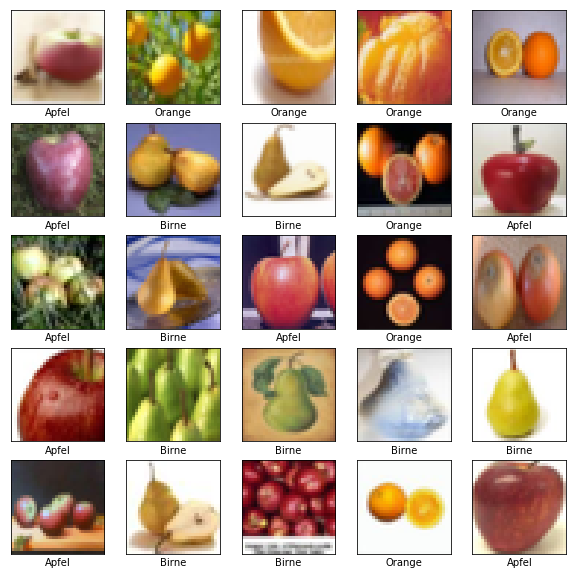

In [5]:
# Für einen ersten Eindruck plotten wir die ersten 25 Bilder in einem 5x5 pyplot
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.asscalar(y_train[i])])

In [6]:
# Das keras Sequential model besteht aus mehreren aneinander geketteten Layern
model = Sequential()
# Zunächst werden die 32 x 32 x 3 Tensoren aufgestackt zu eindimensionalen Arrays
model.add(Flatten(input_shape=(32, 32, 3)))
# Initialisierung des ersten hidden Dense-Layers mit Anzahl
# der Pixel als Neuronen.
model.add(Dense(1024, activation="relu"))
# Initialisierung des Output-Layers mit der Anzahl der Klassen.
model.add(Dense(3, activation="softmax"))

In [7]:
model.compile(optimizer="Adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
tensorboardCb = TensorBoard(log_dir="logs/{}".format(time()))

In [9]:
# Splitten Trainingsdatensatz in Training und Validierung
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20)

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_valid, y_valid))

Train on 1200 samples, validate on 300 samples
Epoch 1/50
1200/1200 [==============================] - 1s 1ms/step - loss: 6.5600 - acc: 0.4375 - val_loss: 6.2592 - val_acc: 0.5067
Epoch 2/50
1200/1200 [==============================] - 1s 855us/step - loss: 5.5911 - acc: 0.5225 - val_loss: 6.1693 - val_acc: 0.5133
Epoch 3/50
1200/1200 [==============================] - 1s 895us/step - loss: 5.5269 - acc: 0.5392 - val_loss: 3.3419 - val_acc: 0.3233
Epoch 4/50
1200/1200 [==============================] - 1s 858us/step - loss: 1.2760 - acc: 0.5525 - val_loss: 1.0599 - val_acc: 0.6200
Epoch 5/50
1200/1200 [==============================] - 1s 861us/step - loss: 0.8021 - acc: 0.6642 - val_loss: 0.8941 - val_acc: 0.6400
Epoch 6/50
1200/1200 [==============================] - 1s 865us/step - loss: 0.7668 - acc: 0.6833 - val_loss: 0.8313 - val_acc: 0.6067
Epoch 7/50
1200/1200 [==============================] - 1s 1ms/step - loss: 0.7986 - acc: 0.6775 - val_loss: 0.9985 - val_acc: 0.5667
Epoch

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

300/300 [==============================] - 0s 178us/step
('Test accuracy:', 0.7433333333333333)


In [11]:
predictions = model.predict(x_test)

# Vorhersagen der Testdaten-Labels.
y_pred = model.predict_classes(x_test, verbose=0)

# Berechnen der Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[77  8 15]
 [12 59 29]
 [ 9  4 87]]


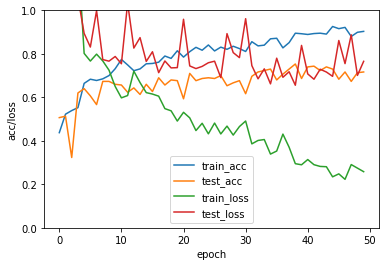

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('acc/loss')
plt.xlabel('epoch')
plt.ylim([0,1])
plt.legend(['train_acc', 'test_acc', 'train_loss', 'test_loss'], loc='best')
plt.show()

In [13]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.asscalar(predicted_label)],
                                100*np.max(predictions_array),
                                class_names[np.asscalar(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i].tolist(), true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[np.asscalar(predicted_label)].set_color('red')
  thisplot[np.asscalar(true_label)].set_color('blue')

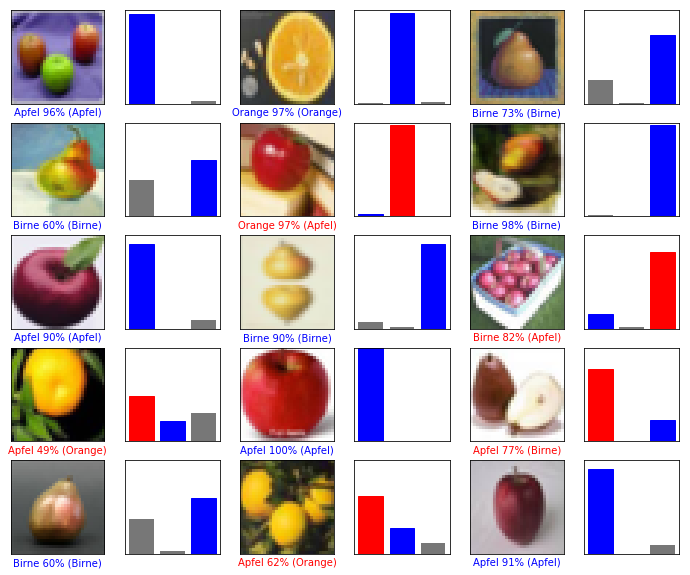

In [14]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)